# Análisis de criterios de redacción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

## Carga de datos y preparación

In [3]:
# Cargar el archivo
file_path = "/workspaces/DiariosModernos/prueba_criterios.csv"
df = pd.read_csv(file_path, encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Texto_Relevancia                   656 non-null    float64
 1   Texto_Impacto                      656 non-null    float64
 2   Texto_Rigor_Etica_Profesional      656 non-null    float64
 3   Texto_Coyuntura                    656 non-null    float64
 4   Texto_Penetracion                  656 non-null    float64
 5   Fotografia_Impacto                 656 non-null    float64
 6   Fotografia_Variedad_Fotos          656 non-null    int64  
 7   Fotografia_Composicion             656 non-null    int64  
 8   Fotografia_Comunica                656 non-null    float64
 9   Fotografia_Puesta_En_Pagina_Fotos  656 non-null    float64
 10  PeriodicosID                       656 non-null    int64  
 11  Fecha                              656 non-null    object 

In [4]:
# Convertir las columnas de ventas y cantidad a valores numéricos
df["Ventas"] = df["Ventas"].replace('[^\d.]', '', regex=True).astype(float)
df["vendido"] = df["vendido"].replace('[^\d.]', '', regex=True).astype(float)
df["Fotografia_Composicion"] = df["Fotografia_Composicion"].replace('[^\d.]', '', regex=True).astype(float)
df["Fotografia_Variedad_Fotos"] = df["Fotografia_Variedad_Fotos"].replace('[^\d.]', '', regex=True).astype(float)
df["PeriodicosID"] = df["PeriodicosID"].replace('[^\d.]', '', regex=True).astype(float)
df["envio_total"] = df["envio_total"].replace('[^\d.]', '', regex=True).astype(float)
df["cobrable"] = df["cobrable"].replace('[^\d.]', '', regex=True).astype(float)
df["devuelto"] = df["devuelto"].replace('[^\d.]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_40084/1978466215.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["Ventas"] = df["Ventas"].replace('[^\d.]', '', regex=True).astype(float)
/tmp/ipykernel_40084/1978466215.py:3: Sy

In [5]:
# Convertir la columna de fecha a tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')
df["año"] = df["Fecha"].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Texto_Relevancia                   656 non-null    float64       
 1   Texto_Impacto                      656 non-null    float64       
 2   Texto_Rigor_Etica_Profesional      656 non-null    float64       
 3   Texto_Coyuntura                    656 non-null    float64       
 4   Texto_Penetracion                  656 non-null    float64       
 5   Fotografia_Impacto                 656 non-null    float64       
 6   Fotografia_Variedad_Fotos          656 non-null    float64       
 7   Fotografia_Composicion             656 non-null    float64       
 8   Fotografia_Comunica                656 non-null    float64       
 9   Fotografia_Puesta_En_Pagina_Fotos  656 non-null    float64       
 10  PeriodicosID                       656

/tmp/ipykernel_40084/199371327.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')


In [10]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Seleccionar las columnas de criterios de evaluación
criterios = df.columns[:12]  # Excluir columnas que no son de evaluación

## Analisis de criterios


In [11]:
# Calcular la puntuación media por periódico
df["puntuacion_media"] = df[criterios].mean()
promedio_por_periodico = df.groupby("PeriodicosID")["Calificacion_avg"].mean().sort_values(ascending=False)

/tmp/ipykernel_40084/1972960802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_periodico.index, y=promedio_por_periodico.values, palette="Blues_r", order=promedio_por_periodico.index) #Blues_r


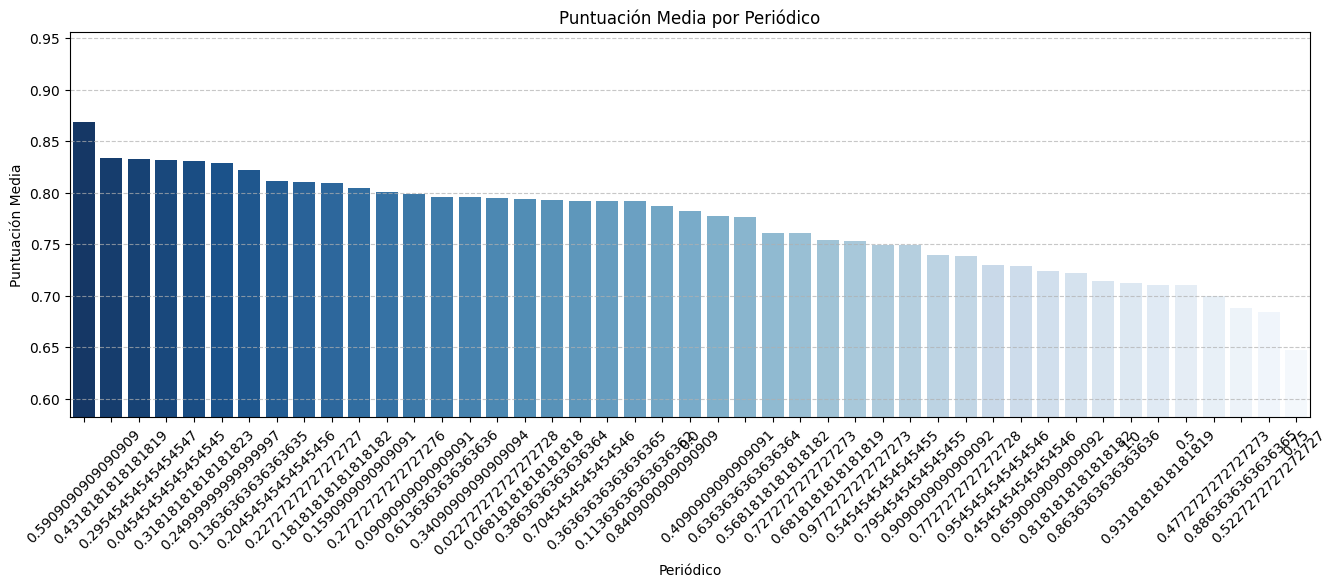

In [13]:
# Gráfico de barras: Puntuación media por periódico con Seaborn
plt.figure(figsize=(16, 5))
sns.barplot(x=promedio_por_periodico.index, y=promedio_por_periodico.values, palette="Blues_r", order=promedio_por_periodico.index) #Blues_r
plt.xlabel("Periódico")
plt.ylabel("Puntuación Media")
plt.title("Puntuación Media por Periódico")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(promedio_por_periodico.min() * 0.9, promedio_por_periodico.max() * 1.1)
plt.show()

In [10]:
# Estadísticas descriptivas
estadisticas = df[criterios].describe()
print("Estadísticas descriptivas:")
print(estadisticas)

Estadísticas descriptivas:
       Texto_Relevancia  Texto_Impacto  Texto_Rigor_Etica_Profesional  \
count        656.000000     656.000000                     656.000000   
mean           0.836433       0.790320                       0.833628   
min            0.000000       0.000000                       0.000000   
25%            0.795000       0.625000                       0.800000   
50%            0.900000       0.875000                       0.800000   
75%            1.000000       1.000000                       1.000000   
max            1.000000       1.000000                       1.000000   
std            0.152508       0.194749                       0.148857   

       Texto_Coyuntura  Texto_Penetracion  Fotografia_Impacto  \
count       656.000000         656.000000          656.000000   
mean          0.833308           0.812246            0.828930   
min           0.000000           0.000000            0.000000   
25%           0.800000           0.777778            0.

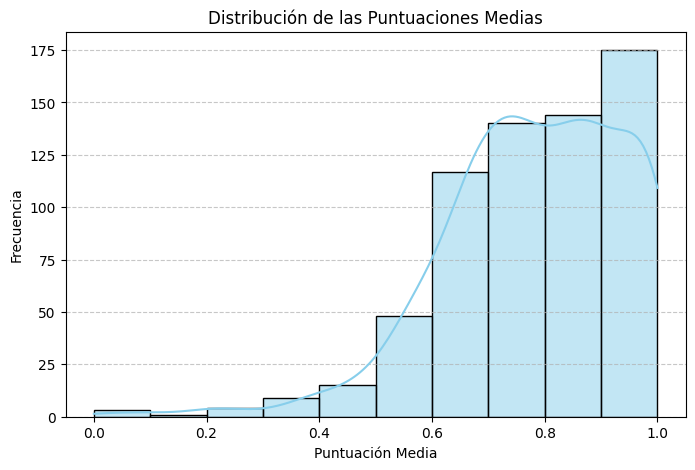

In [11]:
# Histograma: Distribución de puntuaciones medias con Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(df["Calificacion_avg"], bins=10, kde=True, color="skyblue")
plt.xlabel("Puntuación Media")
plt.ylabel("Frecuencia")
plt.title("Distribución de las Puntuaciones Medias")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

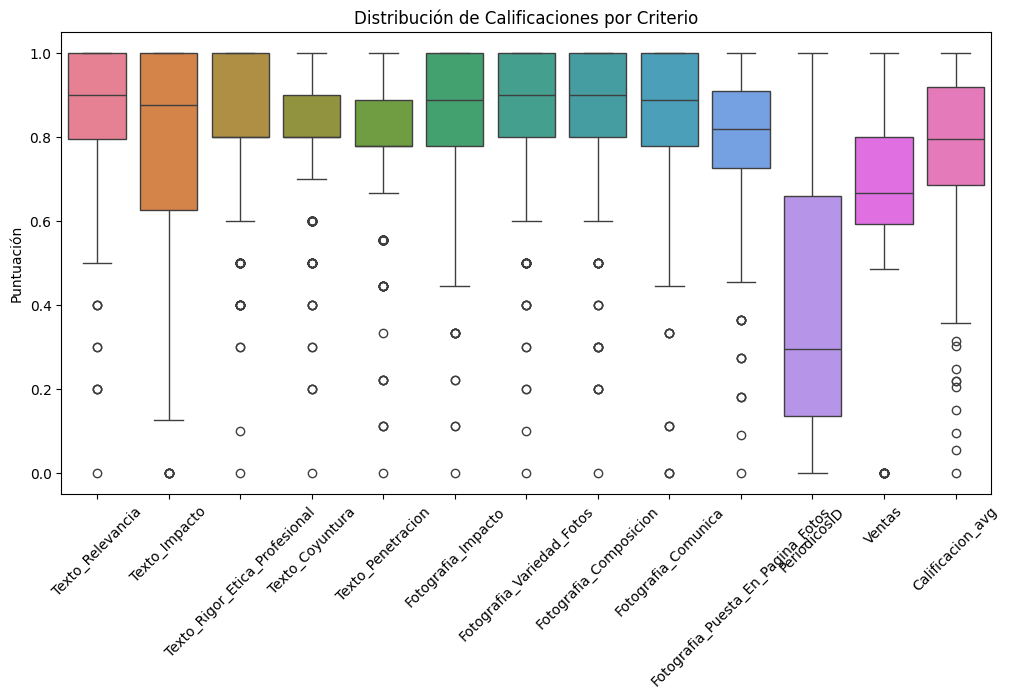

In [12]:
# Gráfico de caja: Comparación de calificaciones por criterio con Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[criterios])
plt.xticks(rotation=45)
plt.title("Distribución de Calificaciones por Criterio")
plt.ylabel("Puntuación")
plt.show()

## Análisis con ventas

In [13]:
# Clasificación de periódicos en 3 grupos según ventas
ventas_ordenadas = df.groupby("PeriodicosID")["Ventas"].mean().sort_values()
mejores_5 = ventas_ordenadas.tail(15).index
enmedio_5 = ventas_ordenadas.iloc[len(ventas_ordenadas)//2 - 2 : len(ventas_ordenadas)//2 + 13].index
peores_5 = ventas_ordenadas.head(15).index

In [14]:
df["grupo_ventas"] = df["PeriodicosID"].apply(lambda x: "Mejores 5" if x in mejores_5 else ("En Medio" if x in enmedio_5 else "Peores 5"))

In [15]:
# Análisis por grupo de ventas
grupo_estadisticas = df.groupby("grupo_ventas")[criterios].mean()
grupo_estadisticas = pd.DataFrame(grupo_estadisticas)
print("Análisis por grupo de ventas:")
print(grupo_estadisticas)

Análisis por grupo de ventas:
              Texto_Relevancia  Texto_Impacto  Texto_Rigor_Etica_Profesional  \
grupo_ventas                                                                   
En Medio              0.827682       0.784437                       0.835762   
Mejores 5             0.834018       0.784598                       0.829018   
Peores 5              0.843060       0.798043                       0.836157   

              Texto_Coyuntura  Texto_Penetracion  Fotografia_Impacto  \
grupo_ventas                                                           
En Medio             0.825166           0.797645            0.799853   
Mejores 5            0.836830           0.815972            0.831349   
Peores 5             0.834875           0.817121            0.842626   

              Fotografia_Variedad_Fotos  Fotografia_Composicion  \
grupo_ventas                                                      
En Medio                       0.843709                0.815894   
Mejores

In [16]:
# Ventas promedio por grupo
ventas_promedio_grupo = df.groupby("grupo_ventas")["Ventas"].mean()
print("Ventas promedio por grupo:")
print(ventas_promedio_grupo)

Ventas promedio por grupo:
grupo_ventas
En Medio     0.683651
Mejores 5    0.860389
Peores 5     0.534063
Name: Ventas, dtype: float64


/tmp/ipykernel_34970/2653110821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_promedio_grupo.index, y=ventas_promedio_grupo.values, palette='Blues_r') #Blues_r #Blues_r


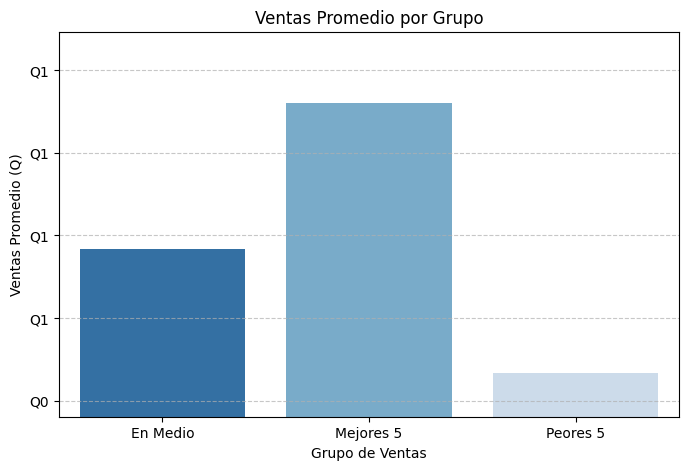

In [17]:
# Gráfico de ventas promedio por grupo con Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_promedio_grupo.index, y=ventas_promedio_grupo.values, palette='Blues_r') #Blues_r #Blues_r
plt.xlabel("Grupo de Ventas")
plt.ylabel("Ventas Promedio (Q)")
plt.title("Ventas Promedio por Grupo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(ventas_promedio_grupo.min() * 0.9, ventas_promedio_grupo.max() * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'Q{x:,.0f}'))
plt.show()

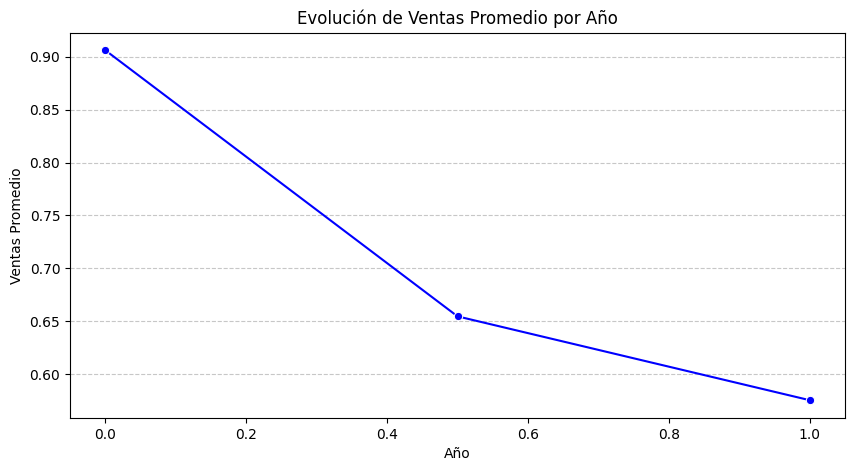

In [18]:
# Evolución de ventas a lo largo de los años
ventas_por_año = df.groupby("año")["Ventas"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker="o", color="blue")
plt.xlabel("Año")
plt.ylabel("Ventas Promedio")
plt.title("Evolución de Ventas Promedio por Año")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
criterios_por_año.info()
# Evolución de criterios a lo largo de los años
criterios_por_año = df.groupby("año")[criterios].mean()
criterios_por_año = df.drop(columns=['Fecha'], errors ='ignore')
plt.figure(figsize=(10, 5))
sns.heatmap(criterios_por_año.T.values, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Evolución de Criterios a lo Largo de los Años")
plt.xlabel("Año")
plt.ylabel("Criterios de Evaluación")
plt.show()

NameError: name 'criterios_por_año' is not defined

In [20]:
# Gráfico de comparación de criterios por grupo con Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(grupo_estadisticas.T, cmap="YlOrBr", annot=True, fmt=".2f")
plt.title("Comparación de Criterios por Grupo de Ventas")
plt.xlabel("Grupo de Ventas")
plt.ylabel("Criterios de Evaluación")
plt.show()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

<Figure size 1200x600 with 0 Axes>